In this post I will be doing a general analysis of Leading Causes of Death in United States (from NCHS)
open-source data was taken from here https://data.cdc.gov/NCHS/NCHS-Leading-Causes-of-Death-United-States/bi63-dtpu

The codes are adapted and modified from Kaggle Post 'General Analysis of Suicide Rates' from 
https://www.kaggle.com/kralmachine/data-visualization-of-suicide-rates


Python 3.7
Jupyter Notebook

# Step 1: Import python packages needed

#visualization: draw statistical graph
# [error]: 
if seaborn is installed but cant import into jupyter notebook, try these few steps:
# [solution 1]: 
in jupyter notebook, run these code before import seaborn: 
import sys
sys.path
# [solution 2]: 
install utils by running "sudo pip install utils" in cmd prompt 
# [solution 3]: 
check if your jupyter notebook upper right hand site, its labelled "trusted". if not, click on "not trusted" and change to trusted. Re-run yr jupyter notebook again.

In [54]:
import pandas as pd

#visualization: draw figures/3D models
import matplotlib.pyplot as plt


import seaborn as sns  

#  step 2

In [39]:
#read file from local storage
data = pd.read_csv(r'C:\Users\Aspire\Downloads\NCHS_-_Leading_Causes_of_Death__United_States.csv')

#show first 5 rows from file
data.head()

#show data last 5 rows
data.tail()

,Year,113 Cause Name,CauseName,State,Deaths,Age-adjustedDeathRate
10291,2003,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Wyoming,273,55.1
10292,2002,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Wyoming,289,58.1
10293,2001,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Wyoming,272,55.5
10294,2000,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Wyoming,245,50.8
10295,1999,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Wyoming,258,52.8


In [40]:
data.sample(frac=0.1)

#Find out the headings to determine what can be interpreted for accident death rates
data.columns

Index(['Year', '113 Cause Name', 'CauseName', 'State', 'Deaths',
       'Age-adjustedDeathRate'],
      dtype='object')

In [41]:
#The info function shows the data types and numerical values of the features in our data set.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 6 columns):
Year                     10296 non-null int64
113 Cause Name           10296 non-null object
CauseName                10296 non-null object
State                    10296 non-null object
Deaths                   10296 non-null int64
Age-adjustedDeathRate    10296 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 482.7+ KB


In [42]:
data.isnull().any()

Year                     False
113 Cause Name           False
CauseName                False
State                    False
Deaths                   False
Age-adjustedDeathRate    False
dtype: bool

In [56]:
#Now start analysis, min year and max year will find them
min_year=min(data.Year)
max_year=max(data.Year)
print('Min Year :',min_year)
print('Max Year :',max_year)

Min Year : 1999
Max Year : 2016


# General Visualisation Part

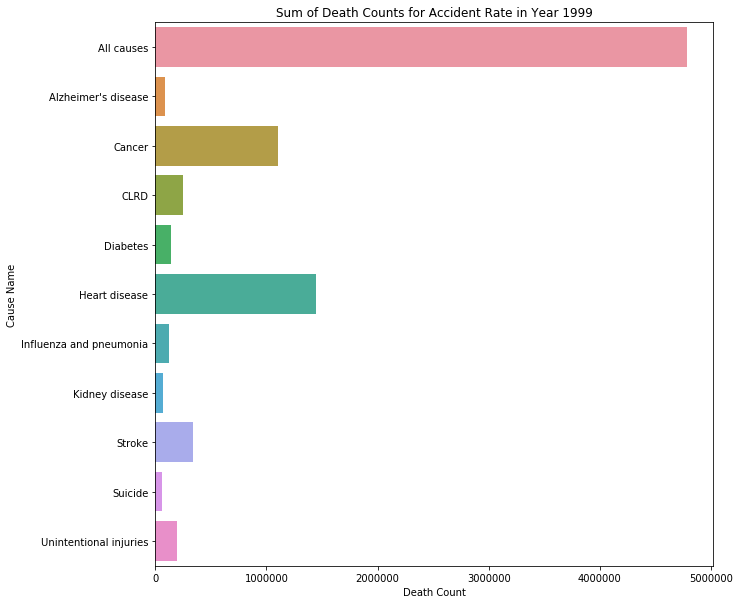

In [55]:
data_CauseName=data[(data['Year']==min_year)]
CauseName_1999=data[(data['Year']==min_year)].CauseName.unique()

CauseName_1999_Deaths=[]

for CauseName in CauseName_1999:
    CauseName_1999_Deaths.append(sum(data_CauseName[(data_CauseName['CauseName']==CauseName)].Deaths))    

#Now year 1999 find sum of deaths for every accident cause name

plt.figure(figsize=(10,10))
sns.barplot(y=CauseName_1999,x=CauseName_1999_Deaths)
plt.xlabel('Death Count')
plt.ylabel('Cause Name')
plt.title('Sum of Death Counts for Accident Rate in Year 1999')
plt.show()

Note that other than 'all causes', the top 3 cause of death in year 1999 are:
    heart disease, cancer, and stroke
    
    
#  Visualization Part 2

In [45]:
Deaths=[]
for State in data.State.unique():
    Deaths.append(sum(data[data['State']==State].Deaths))  


In [46]:
Deaths=pd.DataFrame(Deaths,columns=['Deaths'])
State=pd.DataFrame(data.State.unique(),columns=['State'])
data_Deaths_countr=pd.concat([Deaths,State],axis=1)

In [47]:
data_Deaths_countr=data_Deaths_countr.sort_values(by='Deaths',ascending=False)


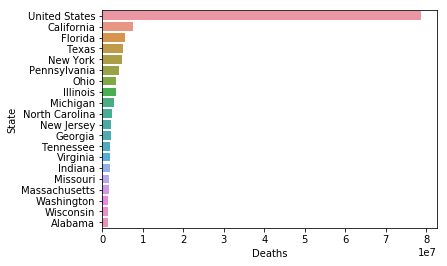

In [52]:
sns.barplot(y=data_Deaths_countr.State[:20],x=data_Deaths_countr.Deaths[:2000])
plt.show()

Note that California, Florida and Texas hit the highest States for death counts in US.